## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Load CSV from GitHub

In [5]:
df = pd.read_csv("Data/data_science_salaries.csv")
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


## 3. Basic Cleaning

In [6]:
df.dropna(how='all', inplace=True)
print("Nulls in each column:\n", df.isnull().sum())

Nulls in each column:
 job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64


## 4. Average Salary by Job Title (Top 10)

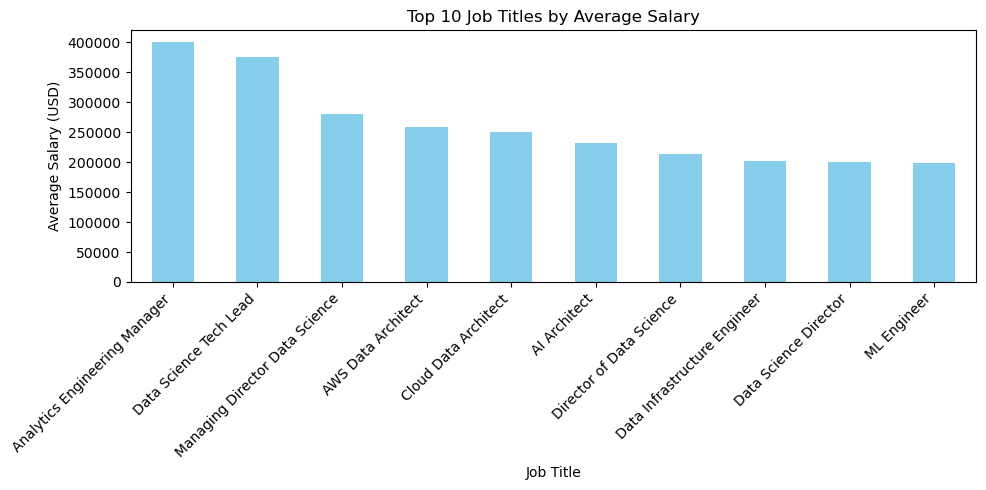

In [7]:
avg_salary_by_job = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
avg_salary_by_job.plot(kind='bar', color='skyblue')
plt.title("Top 10 Job Titles by Average Salary")
plt.xlabel("Job Title")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5. Salary by Experience Level

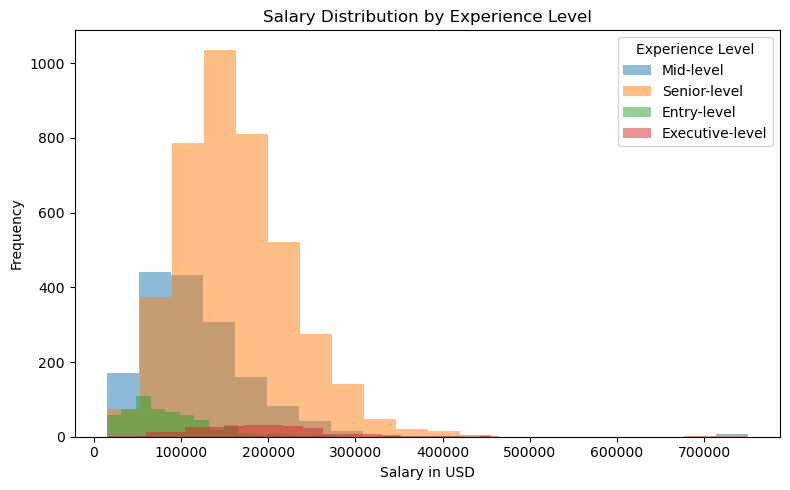

In [10]:
experience_levels = df['experience_level'].unique()

plt.figure(figsize=(8, 5))
for level in experience_levels:
    salaries = df[df['experience_level'] == level]['salary_in_usd']
    plt.hist(salaries, bins=20, alpha=0.5, label=level)

plt.title("Salary Distribution by Experience Level")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.legend(title="Experience Level")
plt.tight_layout()
plt.show()

## 6. Top Countries by Salary

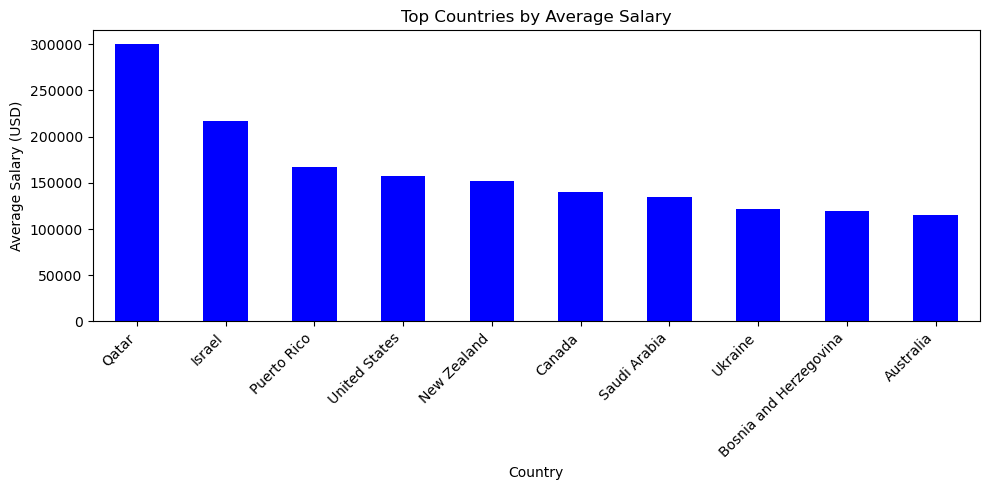

In [12]:
top_countries = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_countries.plot(kind='bar', color='blue')
plt.title("Top Countries by Average Salary")
plt.xlabel("Country")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 7. Remote Work Salary Comparison

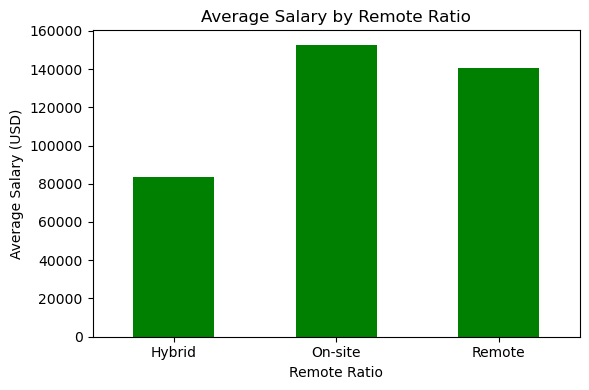

In [14]:
remote_salary = df.groupby('work_models')['salary_in_usd'].mean()

plt.figure(figsize=(6, 4))
remote_salary.plot(kind='bar', color='green')
plt.title("Average Salary by Remote Ratio")
plt.xlabel("Remote Ratio")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 8. Salary by Employment Type

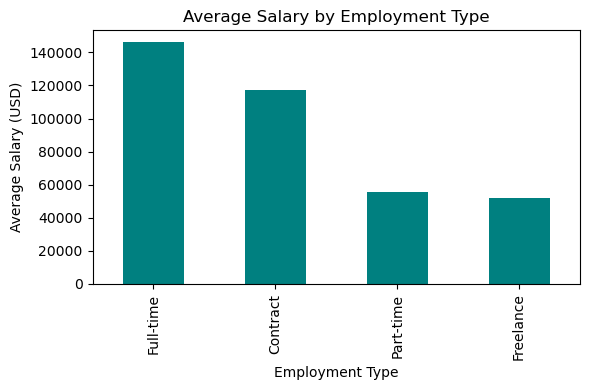

In [15]:
emp_salary = df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
emp_salary.plot(kind='bar', color='teal')
plt.title("Average Salary by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Average Salary (USD)")
plt.tight_layout()
plt.show()


## 9. Top 10 Job Titles with Highest Median Salaries

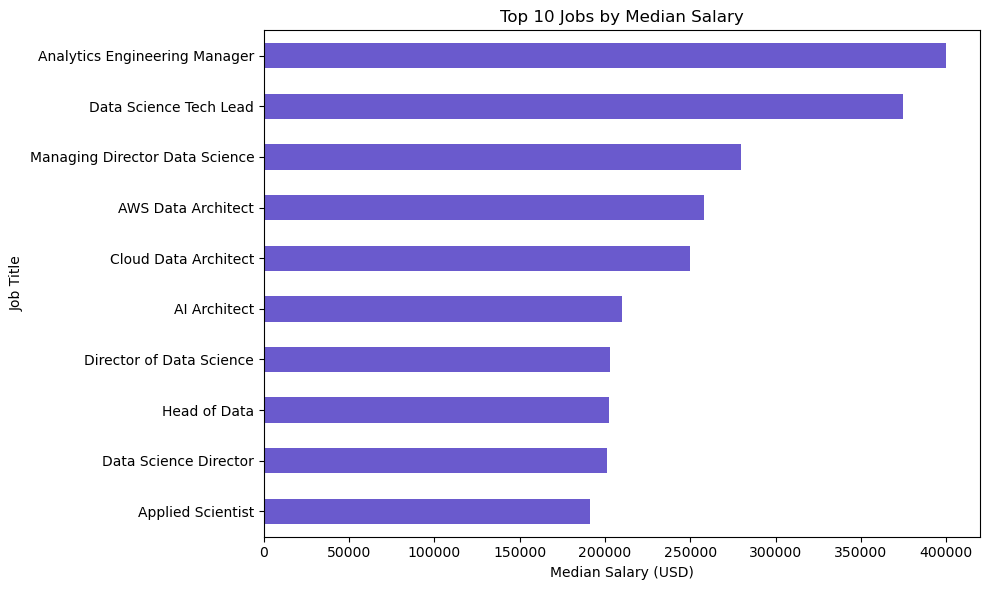

In [16]:
top_median_jobs = df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_median_jobs.plot(kind='barh', color='slateblue')
plt.title("Top 10 Jobs by Median Salary")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Job Title")
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

## 10. Compare Salaries by Company Size and Experience

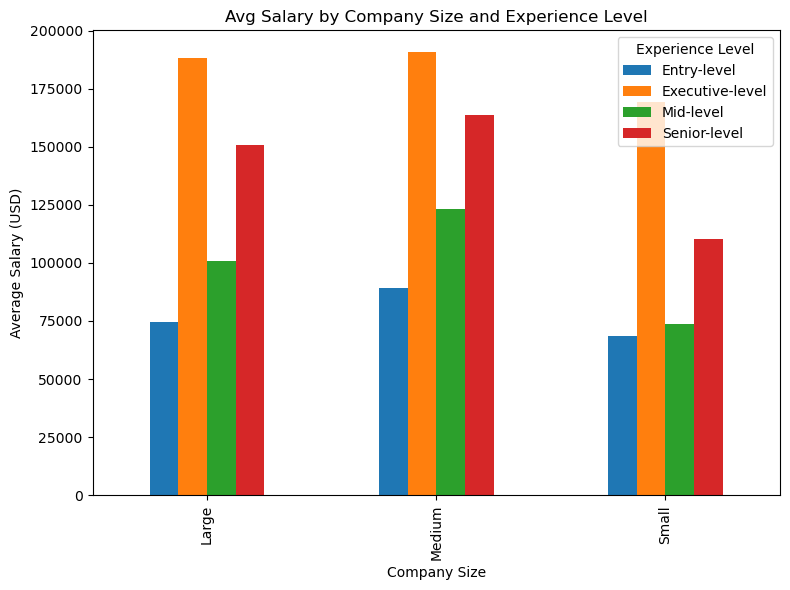

In [17]:
pivot = df.pivot_table(values='salary_in_usd', index='company_size', columns='experience_level', aggfunc='mean')

pivot.plot(kind='bar', figsize=(8, 6))
plt.title("Avg Salary by Company Size and Experience Level")
plt.xlabel("Company Size")
plt.ylabel("Average Salary (USD)")
plt.legend(title="Experience Level")
plt.tight_layout()
plt.show()